
# **Prodigy Infotech**


# **Author : Renad Sameh**

# **Task : 02**

In [3]:
from google.colab import files


uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Titanic.csv')

In [6]:
df.shape

(891, 12)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaning

In [11]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column since it has too many missing values
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Display the cleaned dataset
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


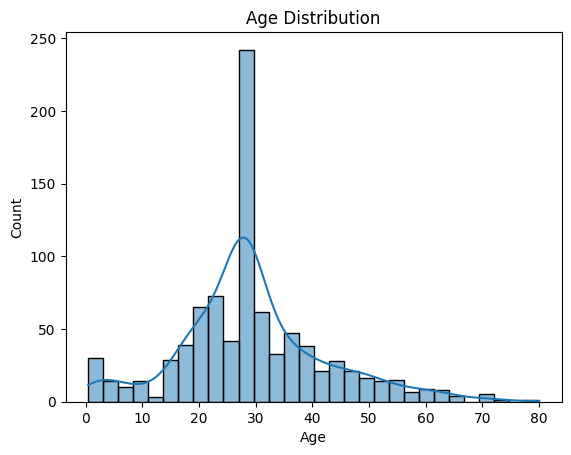

In [14]:
# Age distribution
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

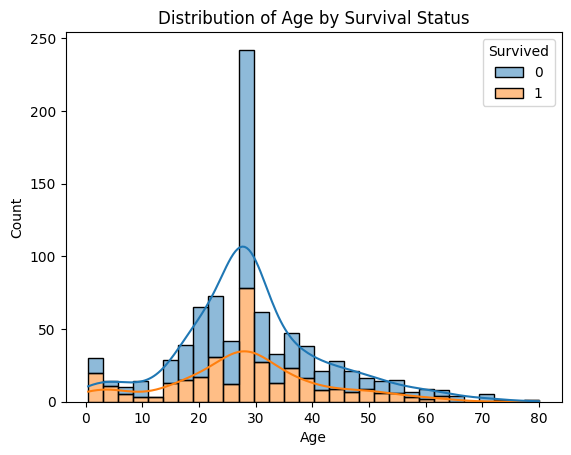

In [15]:
# Distribution of Age by Survival Status
sns.histplot(x='Age', hue='Survived', data=df, multiple='stack', kde=True)
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

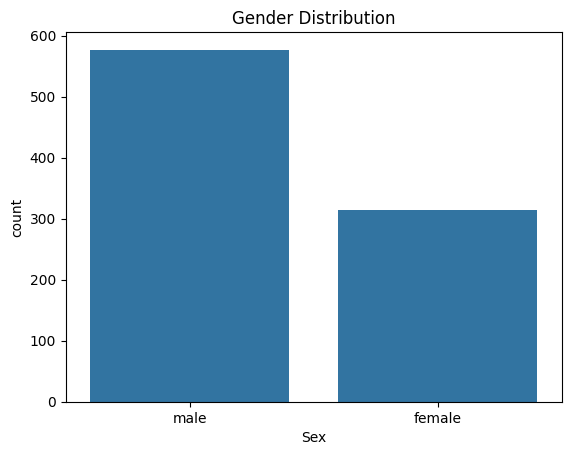

In [16]:
# Gender distribution
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

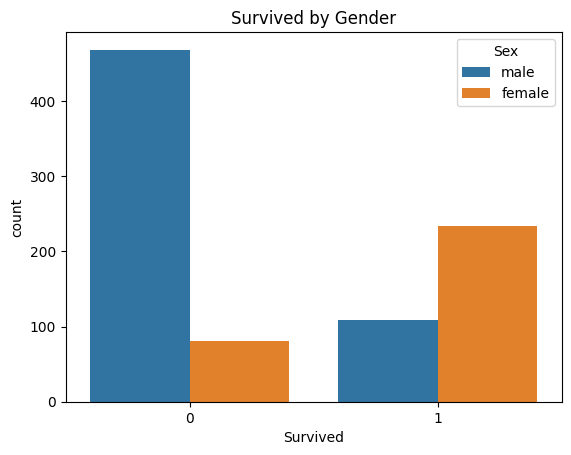

In [17]:
#the relation between survival and sexes
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survived by Gender')
plt.show()

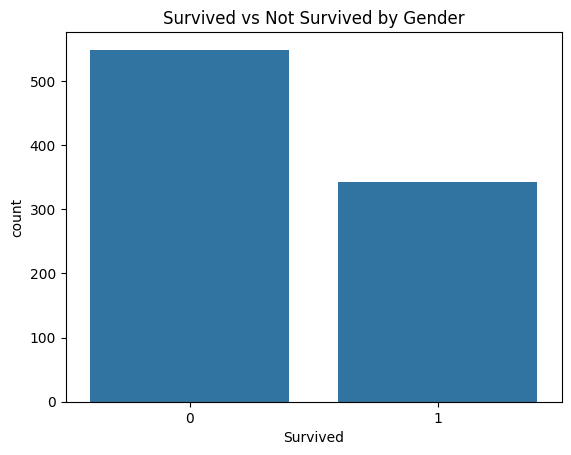

In [18]:
# Survived vs. Not Survived by Gender
sns.countplot(x='Survived', data=df)
plt.title('Survived vs Not Survived by Gender')
plt.show()

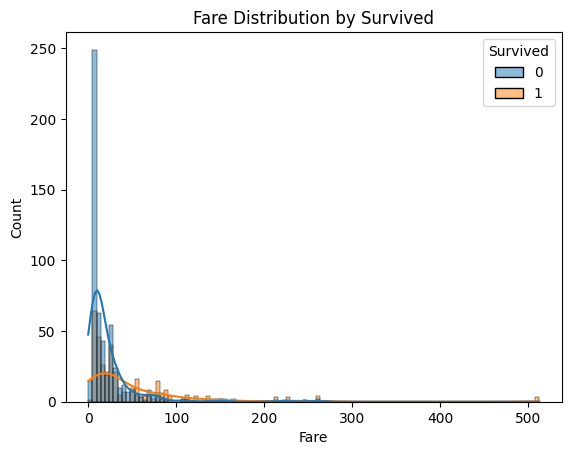

In [19]:
# Fare distribution by Survived
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survived')
plt.show()

Correlation Heatmap

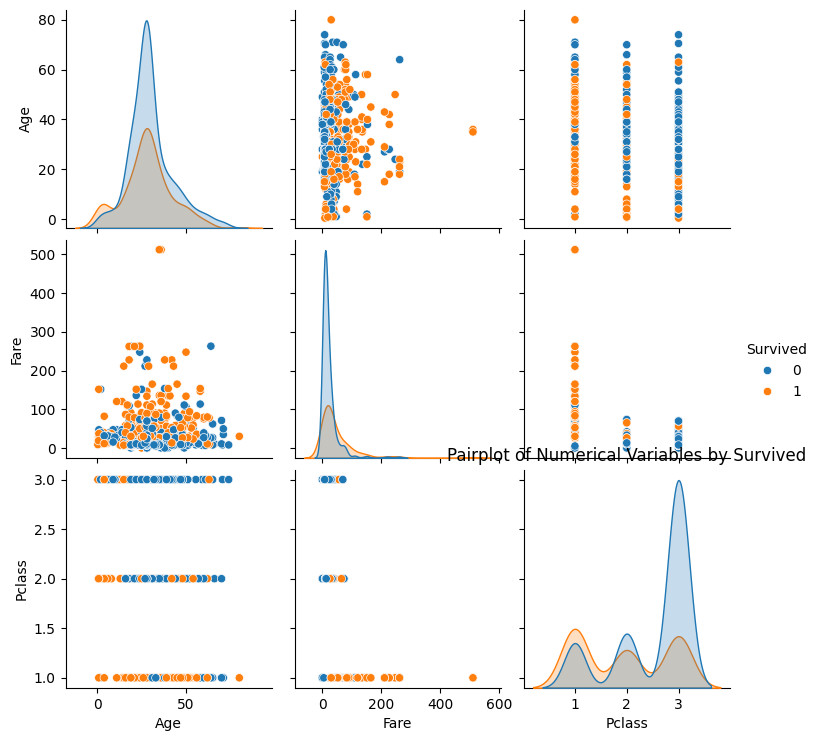

In [20]:
# Pairplot of numerical variables by survival status
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.title('Pairplot of Numerical Variables by Survived')
plt.show()

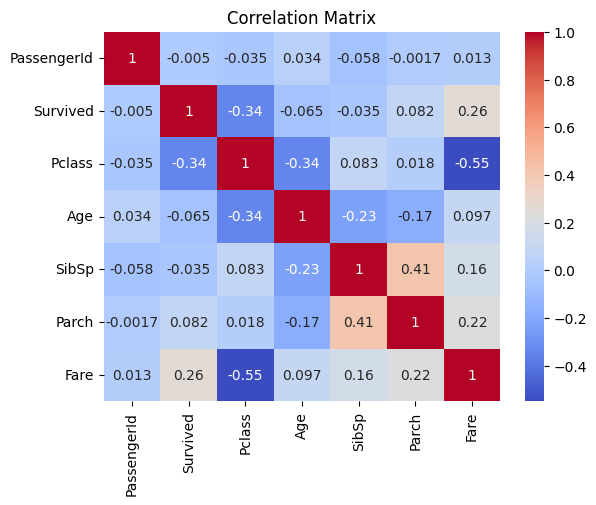

In [21]:
#Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

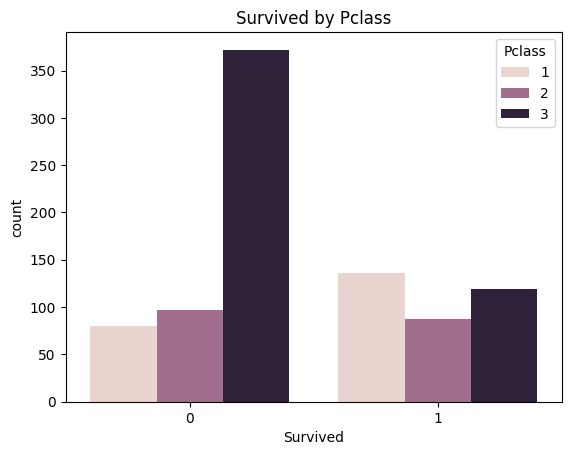

In [22]:
#Survived by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survived by Pclass')
plt.show()

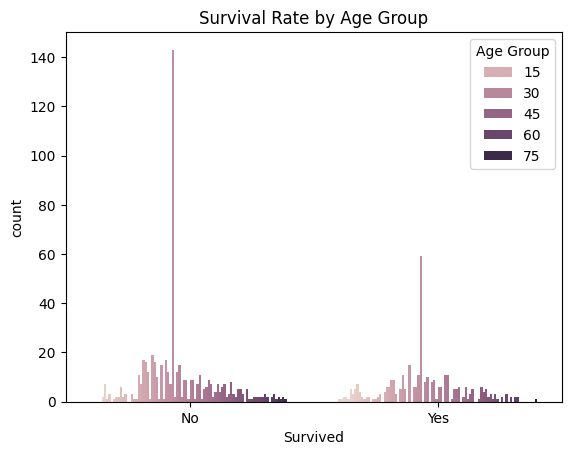

In [23]:
# Survival rate by age group
sns.countplot(x='Survived', hue='Age', data=df)
plt.title('Survival Rate by Age Group')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Age Group')
plt.show()

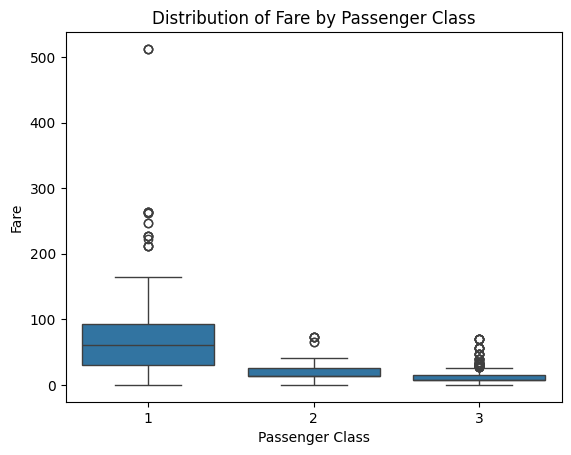

In [27]:
# Distribution of Fare by Passenger Class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Distribution of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

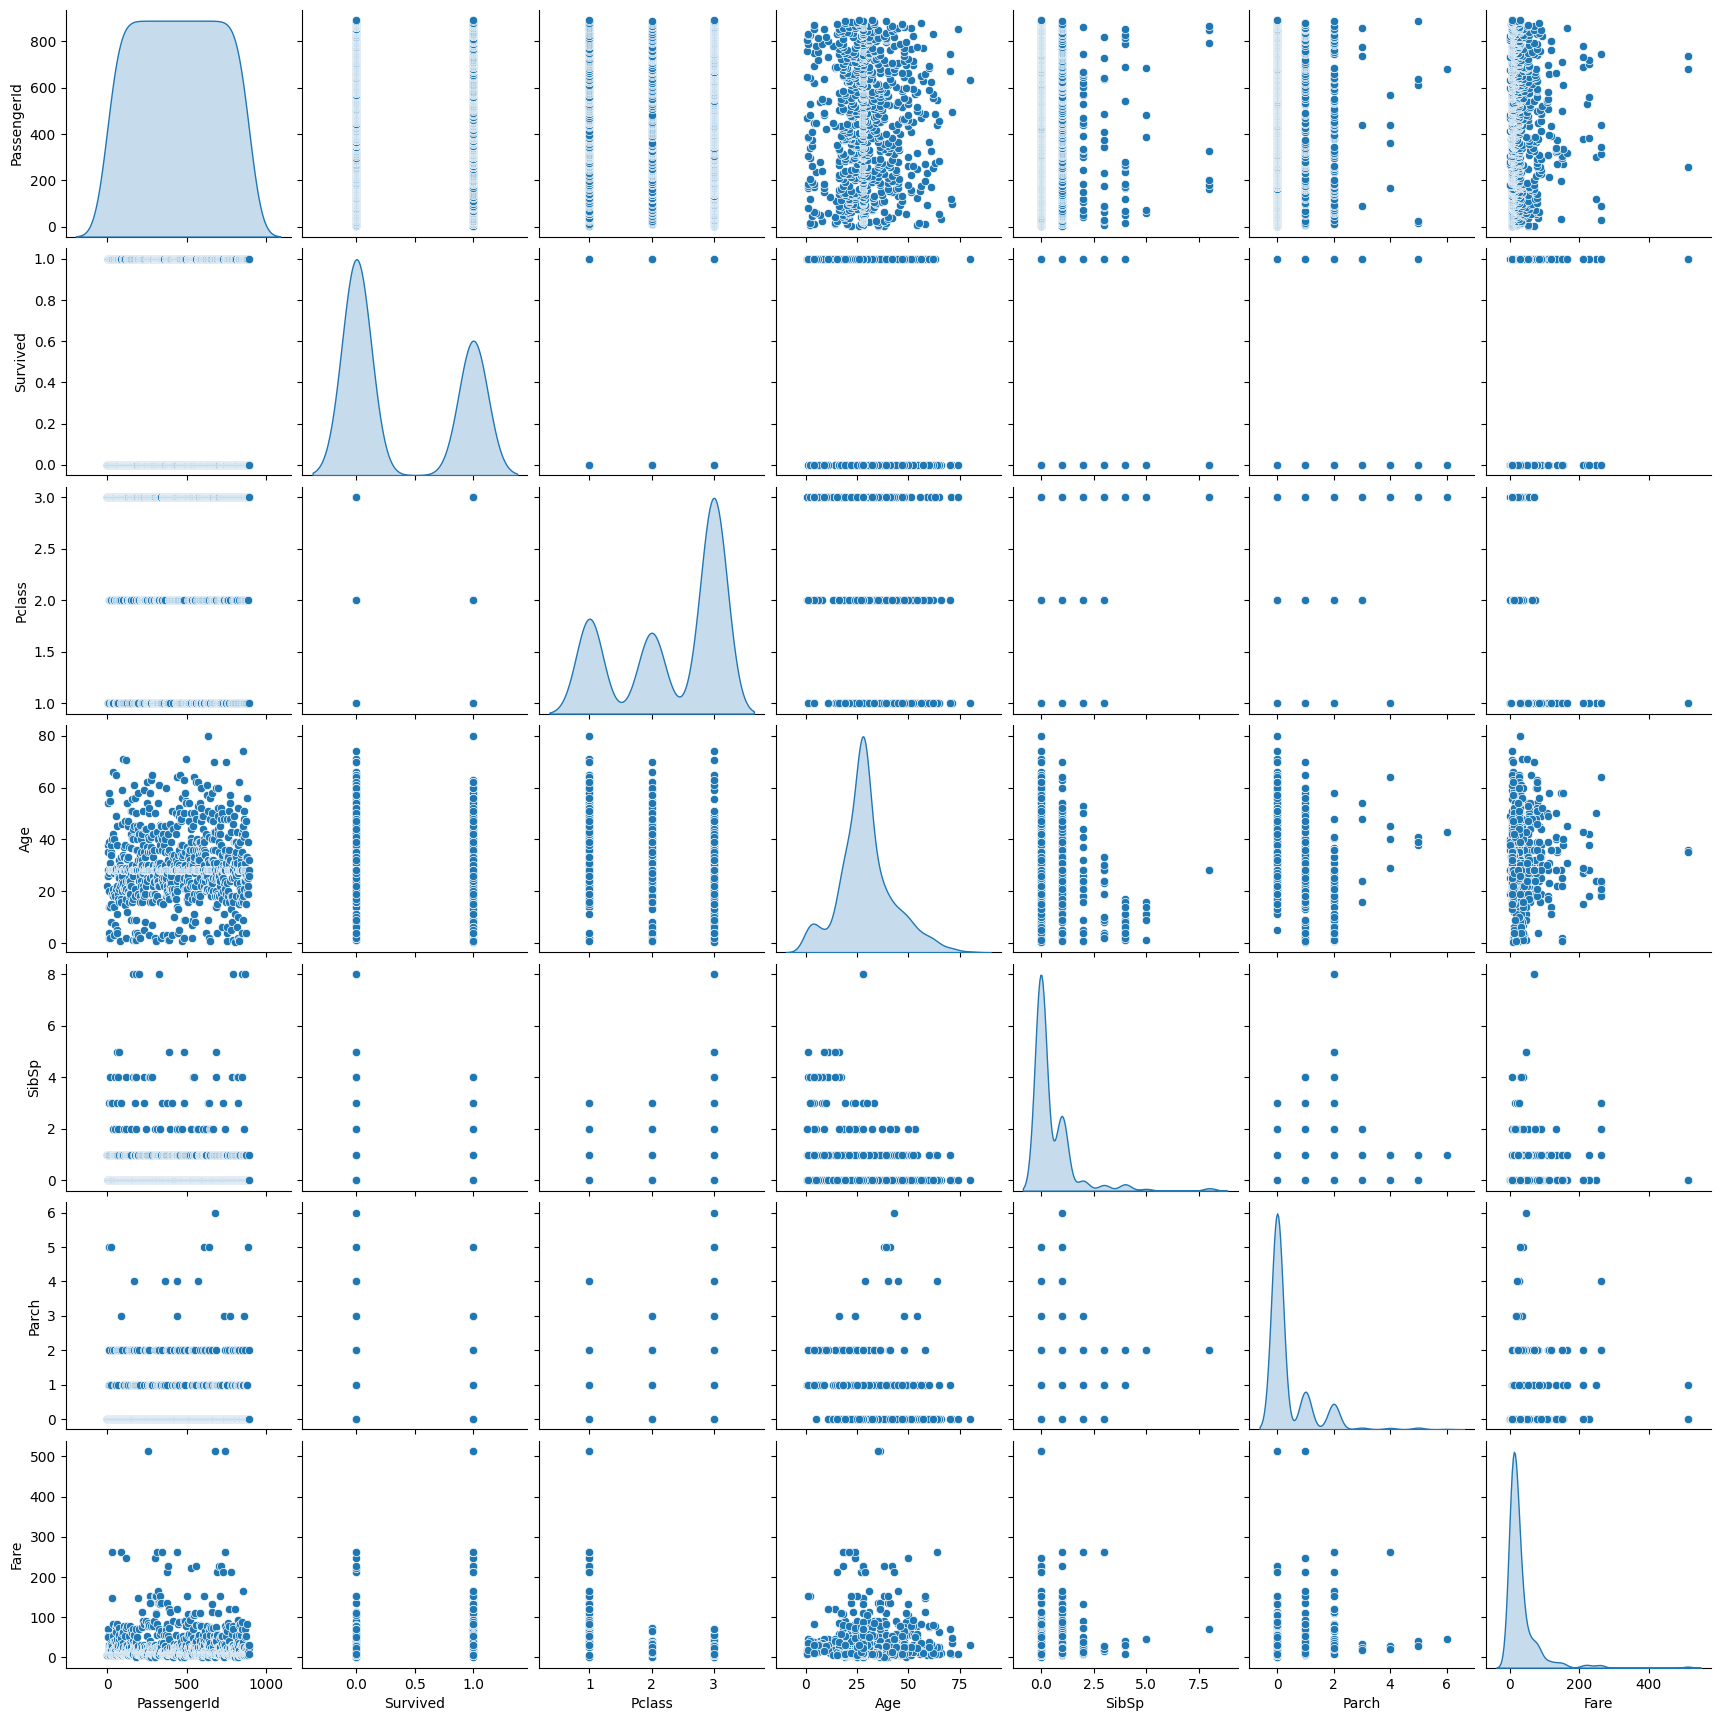

In [25]:
#Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_df, diag_kind='kde')
plt.show()